# Regularization

In this notebook, we will cover the concept of regularization and the following points:
1. Need for Regularization
2. Ridge Approach
3. Lasso Approach

## 1. Need for Regularization

### Problems:
- We need to incorporate a certain number of predictors in our model:
  - We already have these data.
  - We want to improve the quality of the model.
- Problem:
  - The variance of the model increases when adding predictors.
  - This decreases the model's performance.

### Approach:
- Use regularization techniques to minimize variance while allowing the incorporation of as many predictors as necessary.

## Linear Regression:
- Linear regression allows predicting the target based on predictor $X$.

## Polynomial Regression:
- Improves prediction quality by incorporating nonlinearities.
- Problems:
  - Increasing the degree reduces bias but increases variance.
  - We solve one problem but introduce another.

### Coefficient Evaluation
- For a polynomial model with degree 12, certain coefficients are quite high, especially for higher degrees. These significantly contribute to the variance.

## Technique:

- In linear models, we aim to minimize the MSE error.
- We obtain coefficients corresponding to this minimization.
- High-value coefficients result in high model variance.
- Approach: Modify the loss function to penalize large coefficients, reducing variance. This is the principle of regularization.

## 2. Ridge Regularization (L2)
- In linear regression:
$$f_{\theta}(x) = \theta^T x$$
- Corresponding loss function:

> $$L(\theta, X, y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f_{\theta} (X_i))^2$$

- Ridge:

> $$L(\theta, X, y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f_{\theta} (X_i))^2 + \lambda \sum_{j=1}^{p} \theta_j^2$$


### Regularization Term:

> $$\lambda \sum_{j=1}^{p} \theta_j^2$$


- The higher the $\lambda$, the greater the penalty.
- The higher the penalty, the simpler the model and the lower the variance.
- The bias increases.
- Cross-validation is used to select $\lambda$ minimizing the validation error.

## 3. Lasso Regularization (L1)

- In linear regression:
$$f_{\theta}(x) = \theta^T x$$

- Corresponding loss function:

> $$L(\theta, X, y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f_{\theta} (X_i))^2$$

- Lasso:

> $$L(\theta, X, y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f_{\theta} (X_i))^2 + \lambda \sum_{j=1}^{p} |\theta_j|$$


### Regularization Term:

> $$\lambda \sum_{j=1}^{p} |\theta_j|$$

- Lasso forces some coefficients to be zero.
- Some predictors are no longer used: feature selection.

## Difference Between Lasso and Ridge
- Ridge (L2) regularization tends to shrink coefficients equally.
- Lasso (L1) regularization can shrink some coefficients to zero, performing feature selection.

### Example: Implementing Lasso and Ridge in Python


Ridge Regression Mean Squared Error: 3.0590058486382583
Lasso Regression Mean Squared Error: 3.3064947748829727


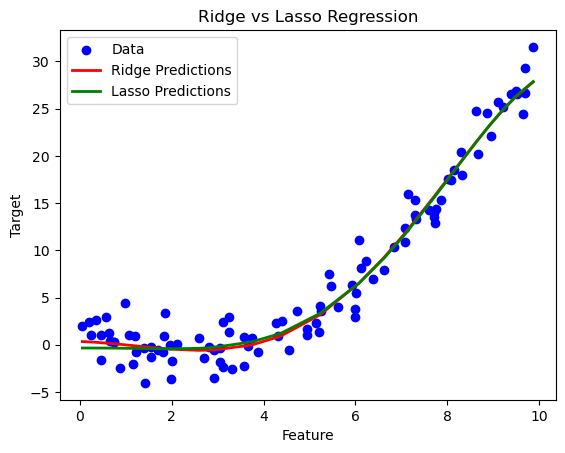

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate fictitious polynomial data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 1 - 2 * X[:, 0] + 0.5 * X[:, 0]**2 + np.random.randn(100) * 2  # Polynomial relationship with noise

# Create polynomial features
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create and train the Ridge model with a higher alpha
ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Create and train the Lasso model with a higher alpha and more iterations
lasso = Lasso(alpha=1.0, max_iter=100000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
print("Ridge Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Data')
plt.plot(np.sort(X_test[:, 1]), y_pred_ridge[np.argsort(X_test[:, 1])], color='red', label='Ridge Predictions', linewidth=2)
plt.plot(np.sort(X_test[:, 1]), y_pred_lasso[np.argsort(X_test[:, 1])], color='green', label='Lasso Predictions', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Ridge vs Lasso Regression')
plt.legend()
plt.show()
